In [10]:
import pandas as pd
import plotly.express as px
import numpy as np
import ast
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
def split_and_deduplicate(countries):
    if pd.isna(countries):
        return []
    seen = set()
    deduplicated_countries = [c.strip() for c in countries.split(',') if c.strip() not in seen and not seen.add(c.strip())]
    return deduplicated_countries

def convert_to_list(entry):
    if pd.isna(entry):
        return []
    try:
        return ast.literal_eval(entry)  # Safely convert the string to a Python list
    except (ValueError, SyntaxError):
        return []

In [12]:
# Load your data
data = pd.read_csv('../data/updated_dataset.csv')

data['company_country_list'] = data['company_country'].apply(convert_to_list)
data['company_deduplicated_countries'] = data['company_country_list'].apply(lambda countries: list(dict.fromkeys(countries)))
company_expanded_data = data.explode('company_deduplicated_countries').rename(columns={'company_deduplicated_countries': 'Country'})
company_country_counts = company_expanded_data['Country'].value_counts().reset_index()
company_country_counts.columns = ['Country', 'Count']

data['university_country_list'] = data['university_country'].apply(convert_to_list)
data['university_deduplicated_countries'] = data['university_country_list'].apply(lambda countries: list(dict.fromkeys(countries)))
university_expanded_data = data.explode('university_deduplicated_countries').rename(columns={'university_deduplicated_countries': 'Country'})
university_country_counts = university_expanded_data['Country'].value_counts().reset_index()
university_country_counts.columns = ['Country', 'Count']

# Create a DataFrame for visualization
company_country_df = company_country_counts.copy()
company_country_df['Log Count'] = np.log1p(company_country_df['Count'])

university_country_df = university_country_counts.copy()
university_country_df['Log Count'] = np.log1p(university_country_df['Count'])


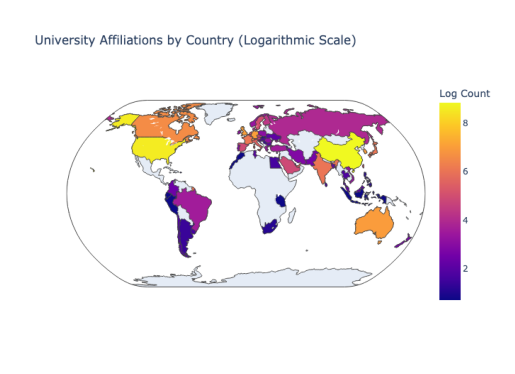

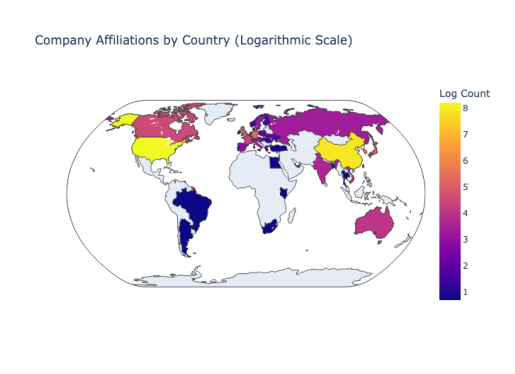

In [14]:
# Plot choropleth map for university affiliations
fig_university = px.choropleth(
    university_country_df,
    locations='Country',
    locationmode='country names',
    color='Log Count',
    title='University Affiliations by Country (Logarithmic Scale)',
    color_continuous_scale='Plasma',
    hover_data={'Count': True},
    projection="natural earth",
)

fig_university.write_image("university_affiliations_map.png")
img = mpimg.imread("university_affiliations_map.png")
imgplot = plt.imshow(img)
plt.axis("off") 
plt.show()

# Plot choropleth map for company affiliations
fig_company = px.choropleth(
    company_country_df,
    locations='Country',
    locationmode='country names',
    color='Log Count',  # Use the logarithmic scale
    title='Company Affiliations by Country (Logarithmic Scale)',
    color_continuous_scale='Plasma',
    hover_data={'Count': True},
    projection="natural earth",
)
fig_company.write_image("company_affiliations_map.png")
img = mpimg.imread("company_affiliations_map.png")
imgplot = plt.imshow(img)
plt.axis("off") 
plt.show()




